# Airplane Accidents Analysis

In [10]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load the data
Load the data with the latin 1 encoding. 
When attempting to load the dataset, I faced a UnicodeDecodeError. This error typically occurs when the dataset contains characters that are not compatible with the utf-8, the default encoding used by the pd.read_csv() function.
The latin1 encoding is a common alternative to try because it can bypass many encoding-related issues without needing to know the exact encoding of the file.

In [20]:
# Loads the data
aviation_accidents_df = pd.read_csv('data/AviationData.csv', encoding='latin-1', low_memory=False)
aviation_accidents_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Inspect the data
Inspect the data to get an overview of the dataset and check for missing values.

In [22]:
# Gets an overview of the dataset
aviation_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [23]:
# Finds number of missing values
aviation_accidents_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [24]:
# Calculates statistics for each column
aviation_accidents_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning
1. Check for duplicate values
2. Remove unnecessary columns and missing values
3. Convert columns to appropriate data types
4. Create 3 new columns that will be essential for data analysis: Total Passengers, Fatal Injury Rate and Total Uninjured Rate

In [25]:
# Makes a copy of the dataset 
aviation_accidents_df_copy = aviation_accidents_df.copy()

In [28]:
# checks for duplicate values
aviation_accidents_df_copy.duplicated().sum()

0

In [32]:
# Cleans column names by replacing dots with underscores
# and capitalizes the first letter of each word in column names
aviation_accidents_df_copy.columns = aviation_accidents_df_copy.columns.str.replace('.', '_').str.title()
aviation_accidents_df_copy.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [40]:
# checks the data types of each value in the 'Model' column
aviation_accidents_df_copy['Model'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
88884    <class 'str'>
88885    <class 'str'>
88886    <class 'str'>
88887    <class 'str'>
88888    <class 'str'>
Name: Model, Length: 88889, dtype: object

In [41]:
# checks the count of each data type in the 'Model' column
aviation_accidents_df_copy['Model'].apply(type).value_counts()

Model
<class 'str'>      88797
<class 'float'>       92
Name: count, dtype: int64

In [44]:
# Converts 'Model' column values to strings and replaces spaces with hyphens
aviation_accidents_df_copy['Model'] = aviation_accidents_df_copy['Model'].astype(str).str.replace(' ', '-')

In [ ]:
# Drops unneeded columns: Latitude, Longitude, Schedule, Air_Carrier, Aircraft_Category, Far_Description
aviation_accidents_df_copy.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air_Carrier', 'Aircraft_Category', 'Far_Description'], inplace=True)

In [45]:
# Creates a new column 'Total_Passengers'
aviation_accidents_df_copy['Total_Passengers'] = aviation_accidents_df_copy['Total_Fatal_Injuries'] + aviation_accidents_df_copy['Total_Serious_Injuries'] + aviation_accidents_df_copy['Total_Minor_Injuries'] + aviation_accidents_df_copy['Total_Uninjured']

In [46]:
# Creates a new column with proportion of fatal injuries per accident
aviation_accidents_df_copy['Fatal_Injury_Proportion'] = aviation_accidents_df_copy['Total_Fatal_Injuries'] / aviation_accidents_df_copy['Total_Passengers']

In [47]:
# Create a new column with proportion of uninjured per accident
aviation_accidents_df_copy['Uninjured_Proportion'] = aviation_accidents_df_copy['Total_Uninjured'] / aviation_accidents_df_copy['Total_Passengers']

In [48]:
# This code is used to investigate rows where 'Fatal_Injuries_Proportion' is NaN.
# By selecting a random sample of 10 such rows, we can manually inspect these cases and better understand why these undefined values might be occurring.
aviation_accidents_df_copy[aviation_accidents_df_copy['Fatal_Injury_Proportion'].isna()].sample(10)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injury_Proportion,Uninjured_Proportion
54409,20030411X00490,Accident,LAX03FA124,2003-04-04,"North Las Vegas, NV",United States,36.293055,-115.348055,KVGT,North Las Vegas Airport,...,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,07-07-2005,NaN,NaN,NaN
58631,20050721X01070,Accident,ANC05LA076,2005-05-14,"DILLINGHAM, AK",United States,59.033333,-158.5,DLG,Dillingham,...,NaN,NaN,3.0,VMC,Landing,Probable Cause,20-12-2005,NaN,NaN,NaN
56725,20040615X00796,Accident,NYC04CA131,2004-05-25,"NEW CASTLE, PA",United States,40.941111,-80.3475,NONE,NaN,...,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,01-09-2004,NaN,NaN,NaN
57308,20040827X01297,Accident,NYC04LA194B,2004-08-17,"Philadelphia, PA",United States,40.081667,-75.010556,PNE,Northeast Philadelphia Airport,...,NaN,NaN,2.0,VMC,Taxi,Probable Cause,28-04-2005,NaN,NaN,NaN
54466,20030423X00555,Accident,NYC03FA082,2003-04-12,"Conesus, NY",United States,42.681111,-77.615833,NaN,NaN,...,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,08-06-2005,NaN,NaN,NaN
48307,20010606X01082,Accident,NYC00WA271,2000-05-05,"Mattawa, Canada",Canada,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,IMC,NaN,Foreign,06-06-2001,NaN,NaN,NaN
55182,20030729X01212,Accident,CHI03LA225,2003-07-25,"MADISON, WI",United States,43.105,-89.185555,87Y,Blackhawk Airfield,...,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,29-07-2004,NaN,NaN,NaN
63174,20070928X01474,Accident,LAX07CA252,2007-08-15,"OLYMPIA, WA",United States,46.969445,-122.9025,OLM,Olympia Airport,...,NaN,NaN,1.0,VMC,Landing,Probable Cause,29-11-2007,NaN,NaN,NaN
58232,20050303X00257,Accident,DEN05LA059,2005-02-26,"KAYCEE, WY",United States,43.664722,-106.705556,NaN,NaN,...,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,27-10-2005,NaN,NaN,NaN
52255,20020417X00527,Accident,DEN02LA038,2002-03-14,"ST. GEORGE, UT",United States,37.088055,-113.591944,SGU,St. George Municipal Airport,...,NaN,NaN,1.0,VMC,Landing,Probable Cause,20-09-2002,NaN,NaN,NaN


In [50]:
# Drop all NaNs in new 'injured' columns 
aviation_accidents_df_copy.dropna(subset=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Fatal_Injury_Proportion', 'Uninjured_Proportion'], inplace=True)

I subset my data further into `top_4_makes`. This is a subset of the 4 most common passenger plane manufacturers according to [Investopedia](https://www.investopedia.com/ask/answers/050415/what-companies-are-major-players-airline-supply-business.asp). I standardize the names of the 4 manufacturers. I've excluded Lockheed Martin because they're mostly involved in military aircraft.

In [53]:
# Replaces NaN values in the 'Make' column with 'None'
aviation_accidents_df_copy['Make'] = aviation_accidents_df_copy['Make'].fillna('None')

# Creates new DF 'top_4_makes' from aviation_accidents_df_copy with top 4 models i.e. Boeing, Airbus, Bombardier, Embraer
top_4_makes = aviation_accidents_df_copy[aviation_accidents_df_copy['Make'].str.contains('|'.join(['Boeing', 'Airbus', 'Bombardier', 'Embraer']))]
top_4_makes.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injury_Proportion,Uninjured_Proportion
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,IMC,Cruise,Probable Cause,06-01-1983,2.0,0.000000,0.5
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,NaN,NaN,CKB,BENEDUM,...,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983,2.0,0.000000,1.0
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,NaN,NaN,WASHINGTON NATIONAL,...,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983,87.0,0.896552,0.0
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,3.0,0.000000,1.0
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,NaN,NaN,ONT,ONTARIO INTERNATIONAL,...,0.0,0.0,119.0,IMC,Approach,Probable Cause,15-02-1983,119.0,0.000000,1.0


In [54]:
# View the different variations of the 'Make' names
top_4_makes['Make'].value_counts()

Make
Boeing                            1031
Airbus Industrie                    69
Embraer                             55
Boeing Stearman                     33
Airbus                              16
Bombardier                           8
Bombardier, Inc.                     8
Boeing Vertol                        5
Boeing - Canada (de Havilland)       2
Airbus Helicopters                   2
Boeing-brown                         1
Embraer Aircraft                     1
Bombardier Canadair                  1
Airbus Helicopters (Eurocopte        1
Airbus Helicopters Deutschland       1
Boeing (Stearman)                    1
Name: count, dtype: int64

### Standardizing the 'Make' names
This code is standardizing the names of the aircraft manufacturers in the ‘Make’ column of the aviation_accidents_df_copy DataFrame. It checks if the name of the manufacturer is one of the top 4 most common manufacturers (`Boeing`, `Airbus`, `Embraer`, `Bombardier`), and if so, it replaces the name with the standardized name. If the name is not one of the top 4 manufacturers, it leaves the name as is. 

In [68]:
# Defines the conditions for each manufacturer. If the 'Make' column contains the name of the manufacturer,
# the condition will be True for that row
conditions = [
    aviation_accidents_df_copy['Make'].str.contains('Boeing'),
    aviation_accidents_df_copy['Make'].str.contains('Airbus'),
    aviation_accidents_df_copy['Make'].str.contains('Embraer'),
    aviation_accidents_df_copy['Make'].str.contains('Bombardier')
]

# Defines the choices corresponding to each condition. If a condition is True, the corresponding choice will be used
choices = ['Boeing', 'Airbus', 'Embraer', 'Bombardier']

# Uses numpy's select function to create a new 'Make' column. For each row, if the condition is True, 
# the corresponding choice is used. If none of the conditions are True, the default value is used (original 'Make' value)
aviation_accidents_df_copy['Make'] = np.select(conditions, choices, default=aviation_accidents_df_copy['Make'])

In [69]:
# Filters the DF to include only rows where 'Make' is one of the specified manufacturers
filtered_df = aviation_accidents_df_copy[aviation_accidents_df_copy['Make'].isin(['Boeing', 'Airbus', 'Embraer', 'Bombardier'])]

# Applies value_counts() to the 'Make' column of the filtered DF
print(filtered_df['Make'].value_counts())

Make
Boeing        1073
Airbus          89
Embraer         56
Bombardier      17
Name: count, dtype: int64


### Standardizing 'Model' names

In [75]:
# Defines a dictionary for model name replacements
model_name_dict = {'DHC8': 'DHC-8', 'CL600': 'CL-600', 'CL600-2B19': 'CL-600-2B19', 
                   'BD700-1A10': 'BD-700-1A10', 'BD100-1A10': 'BD-100-1A10', 'CL600-2D24---900': 'CL600-2D24-900'}

# Replace model names in the 'Model' column
filtered_df.loc[:, 'Model'] = filtered_df['Model'].replace(model_name_dict)

In [77]:
# Export the clean data frame using df.to_csv()
filtered_df.to_csv('data/clean_data.csv', index=False)

### Exploratory Analysis
#### Analysis by Make

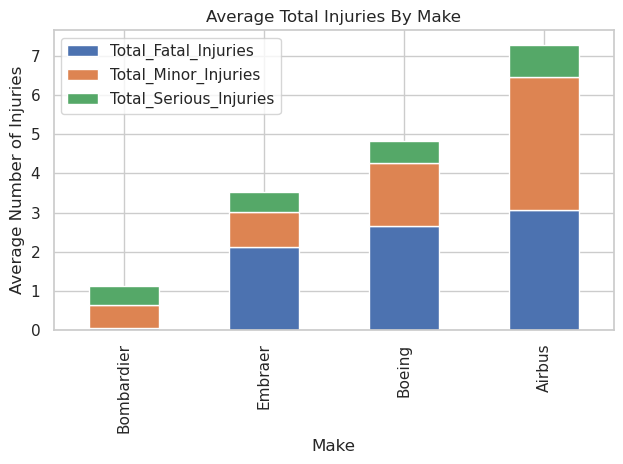

In [81]:
# Plots a bar chart of Aircraft Make by Number of Injuries
sns.set(style='whitegrid', context='notebook')

# Creates stacked bar plot
ax = filtered_df.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']]\
    .mean().sort_values(by='Total_Fatal_Injuries', ascending=True).head().plot(kind='bar', stacked=True)
ax.set_title('Average Fatal, Minor, and Serious Injuries by Make')
ax.set_xlabel('Make')
ax.set_ylabel('Average Number of Injuries');
plt.tight_layout()